<a href="https://colab.research.google.com/github/Joel4ngel/AMP-Tech/blob/master/emisiones_CO2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
#Autor: Joel Taquía

#Llamo las librias que usaré
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#=====================================================
#1. Cargo la data que previamente lo subi a mi DRIVE
ruta= '/content/drive/My Drive/Colab Notebooks/emision_co2.csv'

df = pd.read_csv(ruta,sep=';',)

#Elimino la ultima columna,pues la ultima columna del csv se guardo con ';'
df=df.drop(df.columns[-1], axis='columns')
df

,pais,codigo,construccion,industrias,otros combustibles,transporte,manufacturacion,fugas,energia,nivel
0,China,CHN,457.2,714.80,186.0,686.1,3029.8,0.00,4455.4,muy alto
1,United States,USA,460.6,35.27,46.1,1597.5,438.6,11.93,2360.2,muy alto
2,European Union (27),UE,486.9,53.74,63.1,753.0,377.9,1.86,1289.8,muy alto
3,India,IND,96.6,101.40,57.1,219.2,433.0,1.91,995.1,muy alto
4,Russia,RUS,122.4,26.25,14.1,237.3,169.4,32.66,1007.7,muy alto
5,Japan,JPN,131.0,25.62,18.7,217.2,208.1,0.00,628.3,muy alto
6,Germany,DEU,138.0,13.29,0.5,148.5,93.0,1.59,364.6,muy alto
7,South Korea,KOR,51.3,23.49,9.4,87.6,76.3,0.00,350.7,alto
8,Iran,IRN,113.5,24.43,12.0,121.6,87.4,32.22,177.7,alto
9,Canada,CAN,74.2,6.56,15.3,170.1,65.7,3.34,209.0,alto


In [105]:
#2.	Selecciono las variables dependientes e independientes que usaré en el PCA

#Variables dependientes,la submatriz X contiene los valores de los 7 sectores.
X = df.iloc[:,2:9]

#Variables independientes
y = df.iloc[:,-1]#.values
# El vector y contiene los categoricos de la ultima variable

In [106]:
X.head() #variable dependiente 5 primeros tablas.

,construccion,industrias,otros combustibles,transporte,manufacturacion,fugas,energia
0,457.2,714.80,186.0,686.1,3029.8,0.00,4455.4
1,460.6,35.27,46.1,1597.5,438.6,11.93,2360.2
2,486.9,53.74,63.1,753.0,377.9,1.86,1289.8
3,96.6,101.40,57.1,219.2,433.0,1.91,995.1
4,122.4,26.25,14.1,237.3,169.4,32.66,1007.7


In [107]:
y.head() #variable independiente 5 primeros tablas.

0    muy alto
1    muy alto
2    muy alto
3    muy alto
4    muy alto
Name: nivel, dtype: object

In [108]:
#3. Normalizo las variables
#===========================
from sklearn.preprocessing import StandardScaler
Z = StandardScaler().fit_transform(X)

In [109]:
# Calculo la matriz de varianzas y covarianza
cov_mat=np.cov(Z.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6
0,1.016949,0.599876,0.796729,0.907334,0.680806,0.130058,0.871780
1,0.599876,1.016949,0.952578,0.400725,1.008847,-0.033699,0.890897
2,0.796729,0.952578,1.016949,0.616455,0.975546,-0.006527,0.958993
3,0.907334,0.400725,0.616455,1.016949,0.498685,0.170850,0.775867
4,0.680806,1.008847,0.975546,0.498685,1.016949,-0.015654,0.939005
5,0.130058,-0.033699,-0.006527,0.170850,-0.015654,1.016949,0.093534
6,0.871780,0.890897,0.958993,0.775867,0.939005,0.093534,1.016949


In [110]:
#4.Obtengo los autovectores y autovalores de la matriz de covarianza
#====================================================================
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [111]:
#AUTOVALORES ya ordenados
pd.DataFrame(eig_vals)

,0
0,5.014361
1,1.180004
2,0.784299
3,0.092163
4,0.031250
5,0.014836
6,0.001730


In [112]:
#AUTOVECTORES(filas)
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6
0,0.394220,0.272163,-0.354254,-0.723022,-0.336277,0.090464,0.031546
1,0.402633,-0.301203,0.342116,0.100254,-0.174592,0.419253,0.643283
2,0.436498,-0.144816,0.103748,-0.271321,0.824249,-0.154472,-0.029521
3,0.337705,0.419765,-0.513900,0.542596,0.200980,0.332747,0.011602
4,0.422016,-0.237382,0.258454,0.122625,-0.239177,0.241108,-0.753908
5,0.031933,0.762260,0.644828,-0.023980,0.031801,0.022049,-0.008015
6,0.445852,0.025290,0.001133,0.289052,-0.280072,-0.789203,0.125472


In [113]:
#Creo una lista de parejas (autovalor,autovector) 
#eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


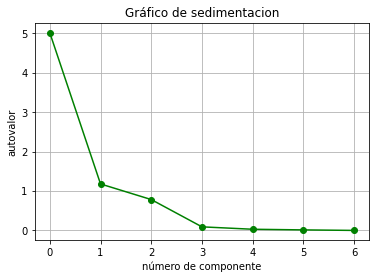

In [124]:
#Grafico de sedimentacion
plt.plot(eig_vals,'go-')
plt.ylabel('autovalor')
plt.xlabel('número de componente')
plt.title('Gráfico de sedimentacion')
plt.grid()
plt.show()

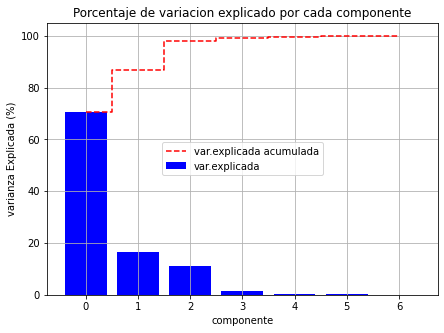

In [140]:

# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)

#varianza porcentual para cada autovalor
var_exp = [(i/tot)*100 for i in eig_vals] #sorted(eig_vals, reverse=True)

#Hago una suma acumulada
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(7,5))

    plt.bar(range(7), var_exp, align='center',label='var.explicada', color='b')
    plt.step(range(7), cum_var_exp, where='mid', linestyle='--', label='var.explicada acumulada',color='r')
    plt.ylabel('varianza Explicada (%)')
    plt.xlabel('componente')
    plt.legend(loc='center')
    plt.title('Porcentaje de variacion explicado por cada componente')
    plt.grid()

In [117]:
#Resumen de las varianzas
data={'Yi':[i for i in range(1,8)],'autovalores':eig_vals,'vza.explic(%)':var_exp,'vza.explic.acum.(%)':cum_var_exp}

resumen=pd.DataFrame(data)
blankIndex=[''] * len(resumen)
resumen.index=blankIndex
resumen

,Yi,autovalores,vza.explic(%),vza.explic.acum.(%)
,1,5.014361,70.439829,70.439829
,2,1.180004,16.576252,87.016082
,3,0.784299,11.017536,98.033618
,4,0.092163,1.294668,99.328286
,5,0.031250,0.438992,99.767278
,6,0.014836,0.208417,99.975695
,7,0.001730,0.024305,100.000000


**TOMANDO 2 DIMENSIONES** : 87% de variabilidad

In [150]:
#5.Selecciono los 2 autovectores más grandes correspondientes a sus CP
# El 1er y 2do autovalor los coloco en una matriz Base: B
B = np.array([eig_vecs[0],eig_vecs[1]])

# Las nuevas variables obtenidas de dimension: 60x2
Y = Z.dot(B.T)

print('Matriz Base:')
pd.DataFrame(B.T)

Matriz Base:



,0,1
0,0.394220,0.402633
1,0.272163,-0.301203
2,-0.354254,0.342116
3,-0.723022,0.100254
4,-0.336277,-0.174592
5,0.090464,0.419253
6,0.031546,0.643283


In [181]:
#Componentes principales y su cetegoria
Y_new=pd.DataFrame(Y, columns=['pc1', 'pc2'])
W=pd.concat([Y_new,y], axis=1)
W.head()

,pc1,pc2,nivel
0,-2.907810,4.479806,muy alto
1,-3.529065,5.057005,muy alto
2,-1.130707,3.382422,muy alto
3,-0.832115,1.072419,muy alto
4,0.178653,2.724244,muy alto


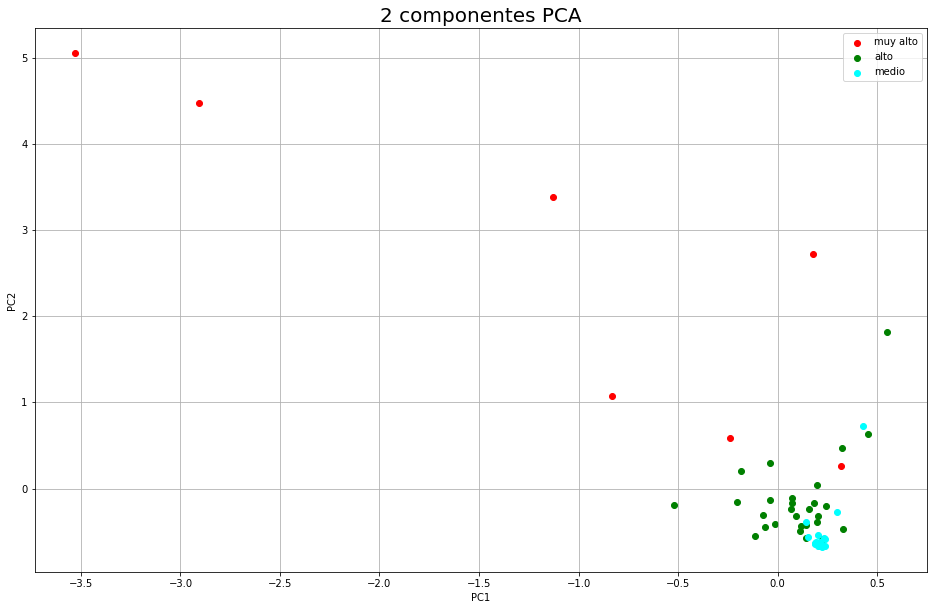

In [204]:
#6. Proyeccion reducida a 2D con sus categorias
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1)

targets = W.nivel.unique()#['muy alto', 'alto', 'medio']
colors = ['r', 'g', 'cyan']
for target, color in zip(targets,colors):
    indice = W['nivel'] == target
    ax.scatter(W.loc[indice, 'pc1'], W.loc[indice,'pc2'], c = color)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2 componentes PCA', fontsize = 20)
ax.legend(targets)
ax.grid()

**TOMANDO 3 DIMENSIONES** : 98% de variabilidad

In [185]:
#5.Selecciono los 2 autovectores más grandes correspondientes a sus CP
# El 1er y 2do autovalor los coloco en una matriz Base: B
B2 = np.array([eig_vecs[0],eig_vecs[1],eig_vecs[2]])

# Las nuevas variables obtenidas de dimension: 60x3
Y2 = Z.dot(B2.T)

print('Matriz Base:')
pd.DataFrame(B2.T)

Matriz Base:


,0,1,2
0,0.394220,0.402633,0.436498
1,0.272163,-0.301203,-0.144816
2,-0.354254,0.342116,0.103748
3,-0.723022,0.100254,-0.271321
4,-0.336277,-0.174592,0.824249
5,0.090464,0.419253,-0.154472
6,0.031546,0.643283,-0.029521


In [186]:
#Componentes principales y su cetegoria
Y2_new=pd.DataFrame(Y2, columns=['pc1', 'pc2','pc3'])
W2=pd.concat([Y2_new,y], axis=1)
W2.head()

,pc1,pc2,pc3,nivel
0,-2.907810,4.479806,6.720545,muy alto
1,-3.529065,5.057005,0.585987,muy alto
2,-1.130707,3.382422,1.840807,muy alto
3,-0.832115,1.072419,0.818252,muy alto
4,0.178653,2.724244,-0.340709,muy alto


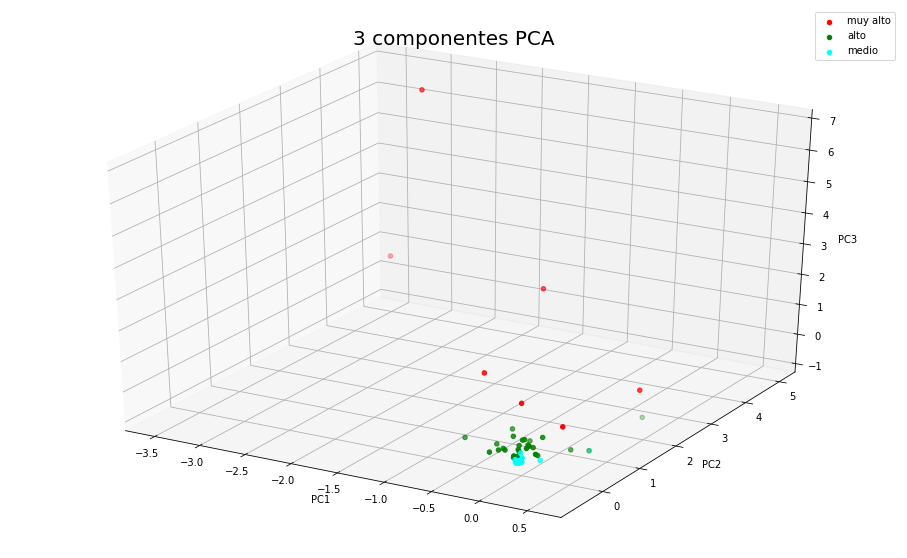

In [205]:

fig = plt.figure(figsize =(16,10))
ax = fig.add_subplot(111, projection='3d')

targets = W2.nivel.unique()#['muy alto', 'alto', 'medio']
colors = ['r', 'g', 'cyan']
for target, color in zip(targets,colors):
    indice = W2['nivel'] == target
    ax.scatter(W2.loc[indice, 'pc1'], W2.loc[indice,'pc2'],W2.loc[indice,'pc3'], c = color)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3 componentes PCA', fontsize = 20)
ax.legend(targets)
ax.grid()
